<a href="https://colab.research.google.com/github/willianrocha/bootcamp-datascience-alura/blob/main/module_2/ds_mod2_lecture4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


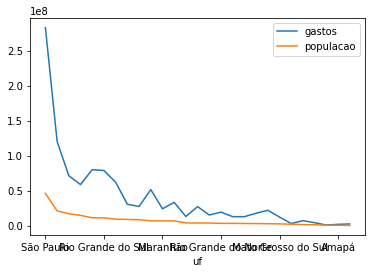

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# Mind the path for the csv file in your gdrive
!cp "/content/drive/MyDrive/alura/bootcamp-data-science/A160324189_28_143_208.csv" .
pd.options.display.float_format = "{:,.2f}".format
dados = pd.read_csv("https://raw.githubusercontent.com/willianrocha/bootcamp-datascience-alura/main/module_1/files/A160324189_28_143_208.csv", encoding="ISO-8859-1",
            skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",",
            engine='python')
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]
ordenado_por_total = ordenado_por_total / 10**6
ordenado_por_total.index = ordenado_por_total.index.str[3:]
mes_mais_recente = ordenado_por_total.columns[-1]
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
df_pop_por_uf = pd.read_html(url)
df_pop_por_uf = df_pop_por_uf[0]

gastos_e_populacao_recente = clean_n_join(df_pop_por_uf, gastos_do_mais_recente)
gastos_e_populacao_recente["gastos"] = gastos_e_populacao_recente["2020/Jul"] * 10**6
gastos_e_populacao_recente["gastos_por_habitante"] = gastos_e_populacao_recente["gastos"] / gastos_e_populacao_recente["populacao"]
gastos_e_populacao_recente[["gastos", "populacao"]].plot()

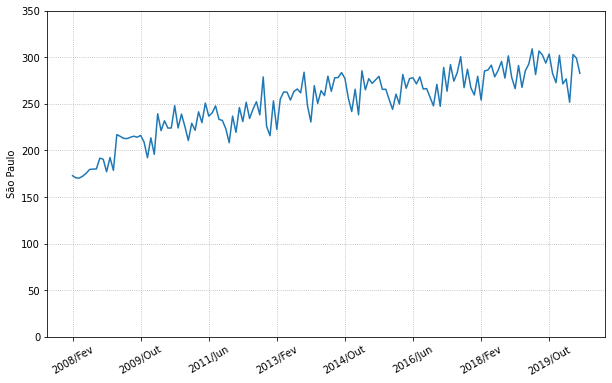

In [9]:
mensal = ordenado_por_total.T
mensal.head()
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
plt.ylim(0, 350)
ax.xaxis.set_major_locator(ticker.AutoLocator())
# ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.grid(True, linestyle=":")
plt.show()

In [15]:
from datetime import date

meses = {
    "Jan" : 1,
    "Fev" : 2,
    "Mar" : 3,
    "Abr" : 4,
    "Mai" : 5,
    "Jun" : 6,
    "Jul" : 7,
    "Ago" : 8,
    "Set" : 9,
    "Out" : 10,
    "Nov" : 11,
    "Dez" : 12
}

def para_dia(ano_mes, sep="/"):
  ano, mes = ano_mes.split(sep)
  return date(int(ano), meses[mes], 1)

mensal.index = mensal.index.map(para_dia)

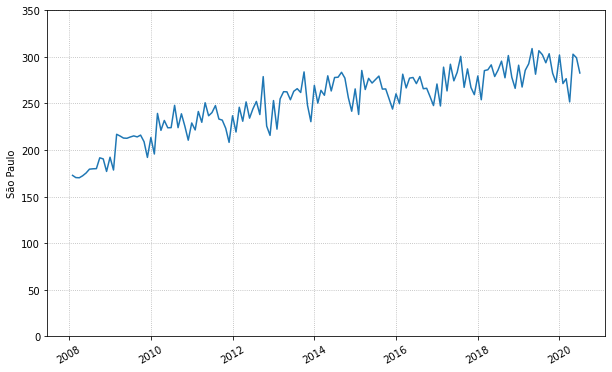

In [19]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
plt.ylim(0, 350)
plt.grid(True, linestyle=":")
plt.show()

In [24]:
mensal_aberto = mensal.reset_index().melt(id_vars=['index'], value_vars=mensal.columns)
mensal_aberto.columns = ["mes", "uf", "gasto"]
mensal_aberto.head()

,mes,uf,gasto
0,2008-02-01,São Paulo,172.83
1,2008-03-01,São Paulo,170.48
2,2008-04-01,São Paulo,170.28
3,2008-05-01,São Paulo,172.40
4,2008-06-01,São Paulo,175.42


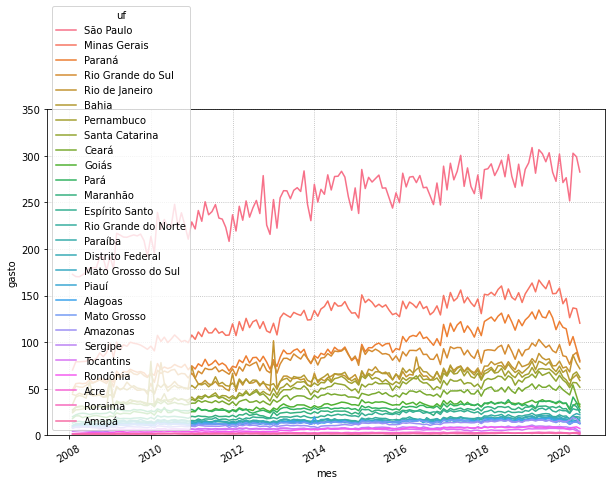

In [26]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x="mes", y="gasto", hue="uf")
plt.xticks(rotation=30)
plt.ylim(0, 350)
plt.grid(True, linestyle=":")
plt.show()

# Desafio

## Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

## Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

In [27]:
mensal_aberto.head()

,mes,uf,gasto
0,2008-02-01,São Paulo,172.83
1,2008-03-01,São Paulo,170.48
2,2008-04-01,São Paulo,170.28
3,2008-05-01,São Paulo,172.40
4,2008-06-01,São Paulo,175.42


In [33]:
mensal_pivot = mensal_aberto.pivot(index="mes", columns="uf", values="gasto")
mensal_pivot.head()

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
mes,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1.74,8.11,1.28,7.93,33.41,27.64,10.22,10.03,18.15,13.45,7.93,8.28,70.30,48.86,10.87,20.13,26.22,9.71,9.11,45.90,44.12,1.94,0.77,24.41,4.64,172.83,5.05
2008-03-01,2.06,9.21,1.18,8.64,41.30,30.09,11.63,12.26,20.99,14.75,9.42,9.79,79.12,55.61,12.35,22.15,30.72,10.43,10.13,52.93,42.89,1.96,0.88,27.48,5.02,170.48,5.20
2008-04-01,2.06,10.47,1.40,8.53,42.83,31.38,11.92,12.45,21.05,15.15,9.39,9.00,79.05,56.12,12.68,23.44,30.59,10.23,10.96,51.97,45.30,2.14,0.90,27.81,5.27,170.28,5.34
2008-05-01,2.23,9.84,1.41,9.08,42.07,31.19,11.90,11.79,19.16,14.54,9.38,9.84,79.27,55.57,13.26,23.86,31.41,10.56,11.03,51.68,43.95,2.28,1.03,28.35,5.37,172.40,5.34
2008-06-01,2.11,10.29,1.42,8.65,39.91,29.46,11.97,11.89,20.33,14.55,9.45,10.26,79.61,56.09,12.25,23.50,28.95,10.47,10.45,53.76,44.10,2.62,0.94,28.99,4.98,175.42,5.40


## Desafio 03: Melhorar o gráfico da distribuição do gráfico:

* Escolha apenas alguns estados.
* Mude a palete de cores.
* Posicione a legenda de forma mais adequada.
* Adicione título principal e nos eixos x e y

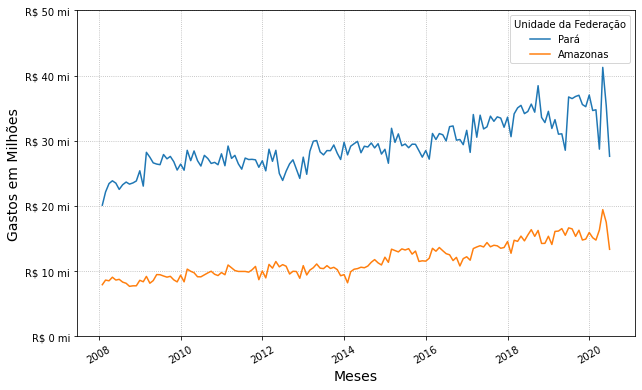

In [52]:
plt.figure(figsize=(10,6))
selected_states = mensal_aberto.query("uf in ('Amazonas', 'Pará')")
ax = sns.lineplot(data=selected_states, x="mes", y="gasto", hue="uf")
leg = ax.get_legend()
leg.set_title("Unidade da Federação")
# ax.legend(loc='upper left')
ax.set_xlabel("Meses", fontsize = 14)
ax.set_ylabel("Gastos em Milhões", fontsize = 14)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.0f} mi"))
plt.xticks(rotation=30)
plt.ylim(0, 50)
plt.grid(True, linestyle=":")
plt.show()